In [95]:
%%capture
%run receptor_tools.ipynb

# Reduced Graph Powers

For a monomeric receptor model with state-transition diagram  {math}`G`, the state-transition diagram for the homodimer (assuming identical subunits) is the reduced graph power {math}`G^{(2)}`.   This expanded state-transition diagram for the receptor dimer can be created in `Sagemath`  by constructing the Cartesian product {math}`G \Box G` by merging vertices that are equivalent up to symmetry.

To illustrate, consider a receptor model with topology given by the path graph [{math}`P_4`](example_graphs:path_graph).

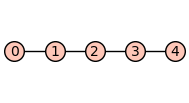

In [96]:
P4 = graphs.PathGraph(5)
P4.show(figsize=2)

The Cartesian product {math}`P_4  \Box P_4` can be constructed using the `Sagemath` method `cartesian_product`.

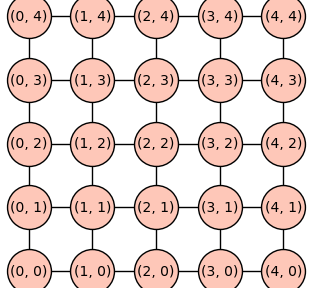

In [97]:
P4P4 = P4.cartesian_product(P4)
pos = {v: v for v in P4P4.vertices(sort=True)}
P4P4.set_pos(pos)
P4P4.show(figsize=4,vertex_size=1000)

The following code takes a graph {math}`G` as input and constructs the Cartesian power graph {math}`G \Box G`.


In [98]:
def Cartesian_power(G=Graph(), k=2):
    # Make Cartesian power G^k (unreduced)
    Gk=G.copy()
    for i in range(k-1):
        Gk = Gk.cartesian_product(G)
    # Make each vertex a tuple
    vflat=list(range(Gk.order()));
    for i in range(Gk.order()):
        v=Gk.vertices(sort=True)[i]
        vflat[i]=tuple(flatten(v))
    Gk.relabel(vflat)
    return Gk

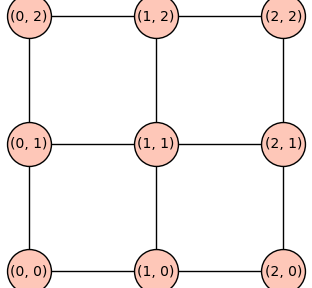

In [99]:
P3P3 = Cartesian_power(graphs.PathGraph(3))
pos = {v: v for v in P3P3.vertices(sort=True)}
P3P3.set_pos(pos)
P3P3.show(figsize=4,vertex_size=1000)

The following code block constructs the Cartesian product graph {math}`G \Box G` \(`GG`\) and then merges vertices that are equivalent by symmetry.  The result is the reduced graph power {math}`G^{(2)}` \(`G2`\). 


In [100]:
def reduced_Cartesian_power(G=Graph(), k=2):
    Gk = Cartesian_power(G, k)
    for v in Gk.vertices(sort=True):
        for u in Gk.vertices(sort=True):
            sv=tuple(sorted(v))
            su=tuple(sorted(u))
            if v!=u and sv==su and v<u and Gk.has_vertex(v) and Gk.has_vertex(u):
                Gk.merge_vertices([v,u])
    return Gk

To illustrate we construct the reduced Cartesian power {math}`P_4^{2}`.    

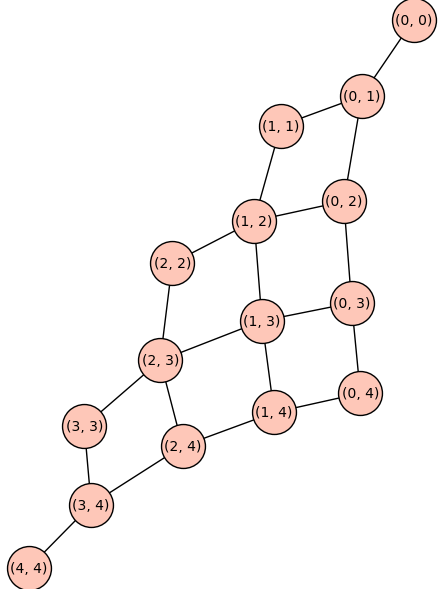

In [101]:
P42 = reduced_Cartesian_power(P4,2)
P42.show(figsize=8,vertex_size=1000)

Below we construct the cycle graph {math}`C_5`, the Cartesian product graph {math}`C_5 \Box C_5`, and the reduced Cartesian power {math}`C_5^(2)`.

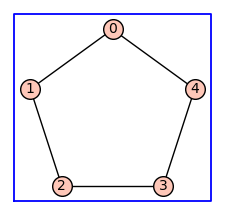

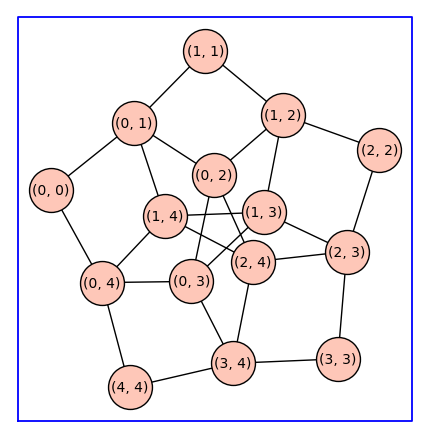

In [102]:
C5 = graphs.CycleGraph(5)
C5.show(figsize=3,graph_border=True)
C52 = reduced_Cartesian_power(C5)
C52.show(figsize=6,vertex_size=1000,graph_border=True)

Beginning with a monomer model with state-transition diagram {math}`G`, the state-transition diagram for a receptor {math}`k`-mer is given by reduced Cartesian power {math}`G^(k)`.   Below we constuct {math}`C_5^3`.

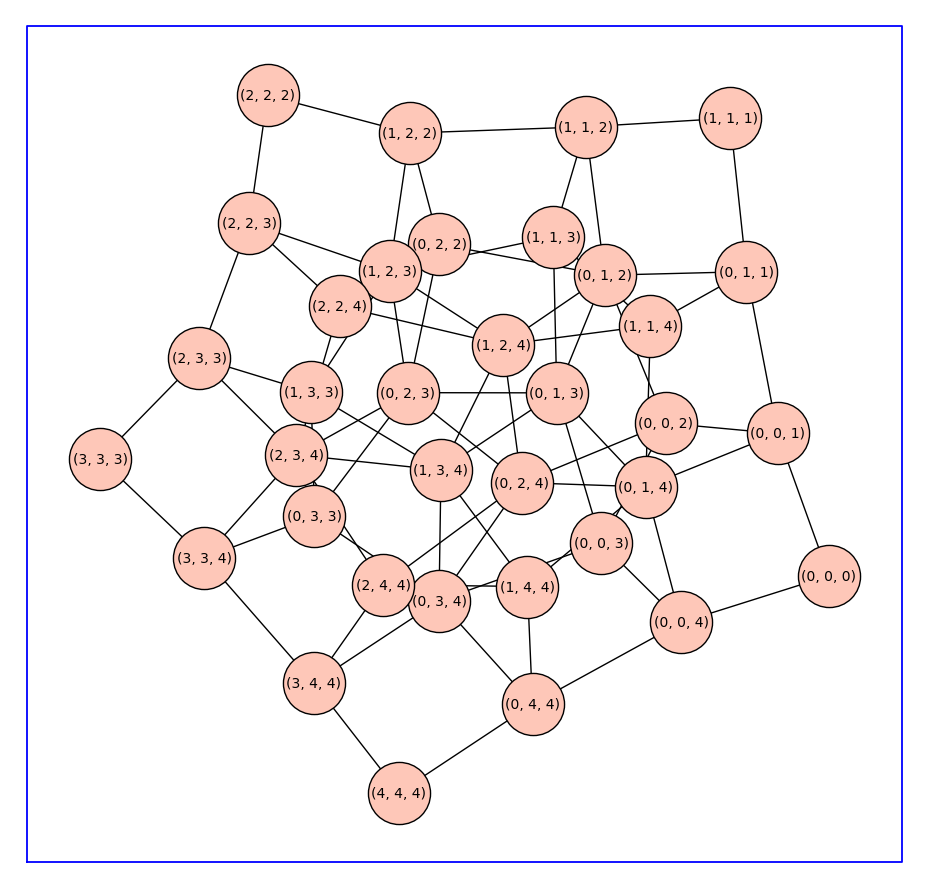

In [103]:
C53 = reduced_Cartesian_power(C5,3)
C53.show(figsize=12,vertex_size=2000,graph_border=True)

Below is another way to visualize the Cartesian product graph {math}`P_4 \Box P_4 \Box P_4`.  This is followed by the reduced Cartesian power {math}`P_4^3`.

In [104]:
P4P4P4 = Cartesian_power(graphs.PathGraph(4),3)
P4P4P4.show3d()

Graphics3d Object

In [105]:
P43 = reduced_Cartesian_power(graphs.PathGraph(4),3)
P43.show3d()

Graphics3d Object

The reduced Cartesian power {math}`C_3^k` has the structure of a triangular lattice.  For example, {math}`C_3^5` is show below. 

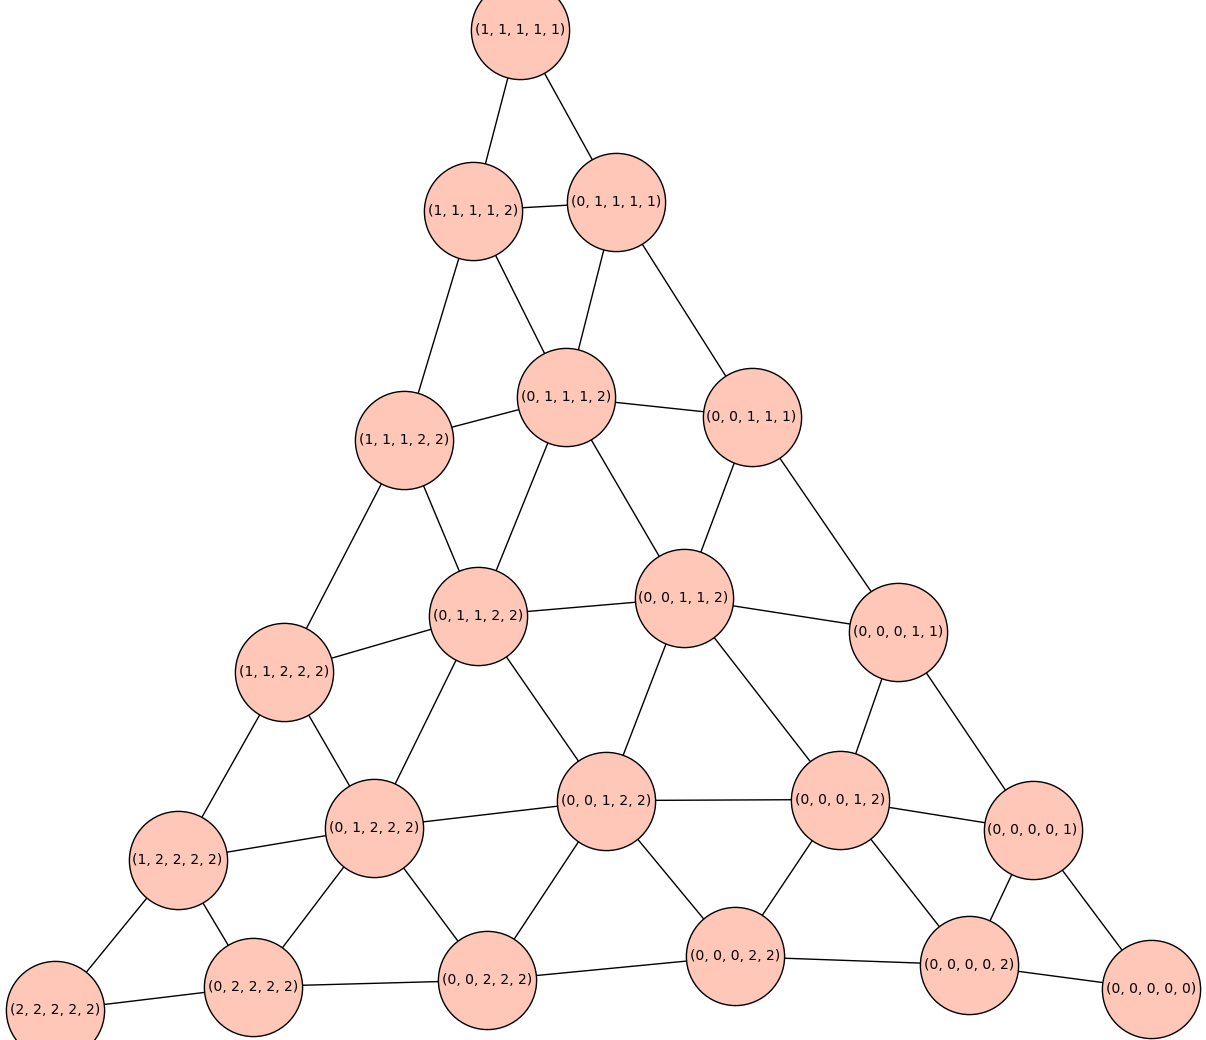

In [106]:
C3_5 = reduced_Cartesian_power(graphs.CycleGraph(3),5)
C3_5.show(figsize=14,vertex_size=5000)